In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/r4-2-dataset/r4.2/file.csv
/kaggle/input/r4-2atdataset/r4.2zipped/logon.csv
/kaggle/input/r4-2atdataset/r4.2zipped/device.csv
/kaggle/input/r4-2atdataset/r4.2zipped/psychometric.csv
/kaggle/input/r4-2atdataset/r4.2zipped/http.csv
/kaggle/input/r4-2atdataset/r4.2zipped/readme.txt
/kaggle/input/r4-2atdataset/r4.2zipped/license.txt
/kaggle/input/r4-2atdataset/r4.2zipped/email.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-08.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2011-03.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-10.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-02.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-03.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-09.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2011-04.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2009-12.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-06.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/2010-07.csv
/kaggle/input/r4-2atdataset/r4.2zipped/LDAP/20

# **Logon file EDA**

In [3]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

df_logon = pd.read_csv("/kaggle/input/r4-2atdataset/r4.2zipped/logon.csv")
df_logon.head()

,id,date,user,pc,activity
0,{X1D9-S0ES98JV-5357PWMI},01/02/2010 06:49:00,NGF0157,PC-6056,Logon
1,{G2B3-L6EJ61GT-2222RKSO},01/02/2010 06:50:00,LRR0148,PC-4275,Logon
2,{U6Q3-U0WE70UA-3770UREL},01/02/2010 06:53:04,LRR0148,PC-4124,Logon
3,{I0N5-R7NA26TG-6263KNGM},01/02/2010 07:00:00,IRM0931,PC-7188,Logon
4,{D1S0-N6FH62BT-5398KANK},01/02/2010 07:00:00,MOH0273,PC-6699,Logon


In [4]:
# Shape of df
print("Shape of the DataFrame:", df_logon.shape)

# Data Types
print("\nData Types of Columns:\n", df_logon.dtypes)

# Checking for Missing Values
print("\nMissing Values per Column:\n", df_logon.isnull().sum())

# Descriptive Statistics for Numerical Columns
print("\nDescriptive Statistics for Numerical Columns:\n", df_logon.describe())

# Examining Unique Values for Categorical Columns
for column in ['user', 'pc', 'activity']:  # Assuming 'user', 'pc', 'activity' are categorical
  print(f"\nUnique values for {column}:\n{df_logon[column].unique()}")
  print(f"\nValue Counts for {column}:\n{df_logon[column].value_counts()}")



Shape of the DataFrame: (854859, 5)

Data Types of Columns:
 id          object
date        object
user        object
pc          object
activity    object
dtype: object

Missing Values per Column:
 id          0
date        0
user        0
pc          0
activity    0
dtype: int64

Descriptive Statistics for Numerical Columns:
                               id                 date     user       pc  \
count                     854859               854859   854859   854859   
unique                    854859               338041     1000     1003   
top     {X1D9-S0ES98JV-5357PWMI}  01/05/2010 08:00:00  WPR0368  PC-4124   
freq                           1                   61     3470    25514   

       activity  
count    854859  
unique        2  
top       Logon  
freq     470591  

Unique values for user:
['NGF0157' 'LRR0148' 'IRM0931' 'MOH0273' 'LAP0338' 'MHH0180' 'NOB0181'
 'AHC0142' 'CTR0341' 'ATE0869' 'NWK0215' 'HVB0037' 'ABC0174' 'AJR0319'
 'JKJ0698' 'JCR0172' 'HAD0246' 'RRC05

# *Counting number of logon events for each day*

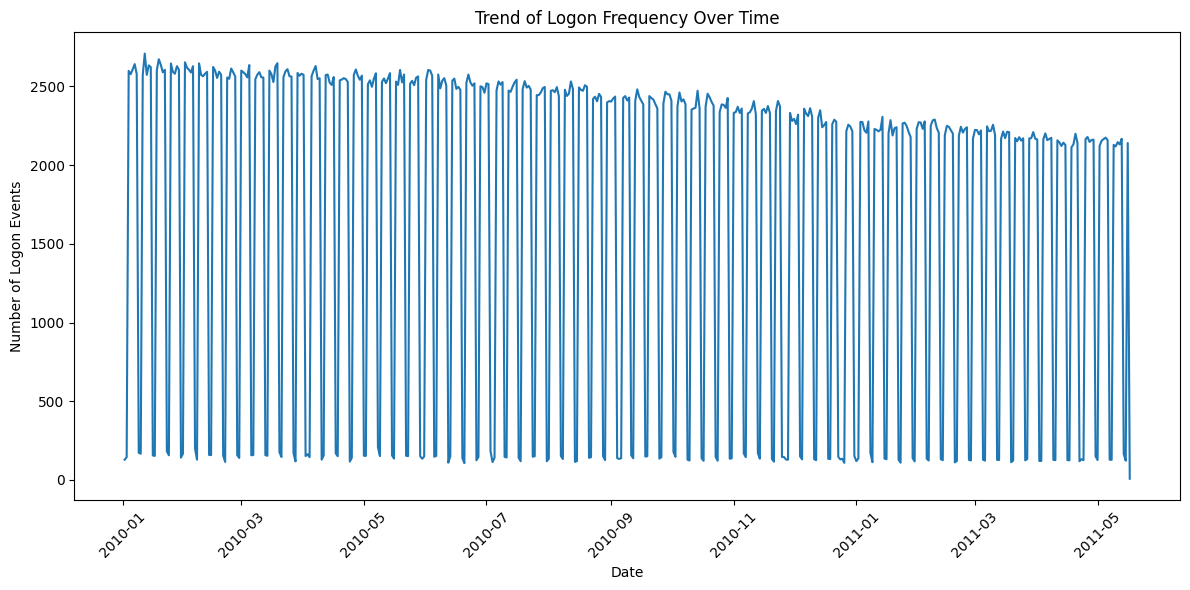

In [5]:
# Converting Datetime
df_logon['date'] = pd.to_datetime(df_logon['date'], errors='coerce')



logon_frequency_by_day = df_logon.groupby(df_logon['date'].dt.date)['id'].count()

# Analyzing the trend of logon frequency.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(logon_frequency_by_day.index, logon_frequency_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Logon Events')
plt.title('Trend of Logon Frequency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# *Analyzing Logon times*

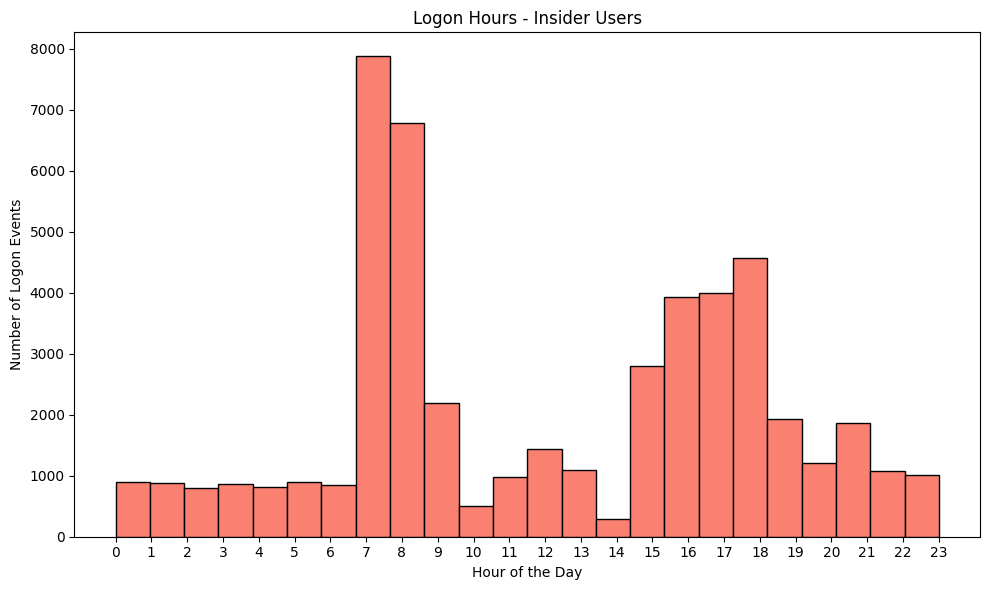

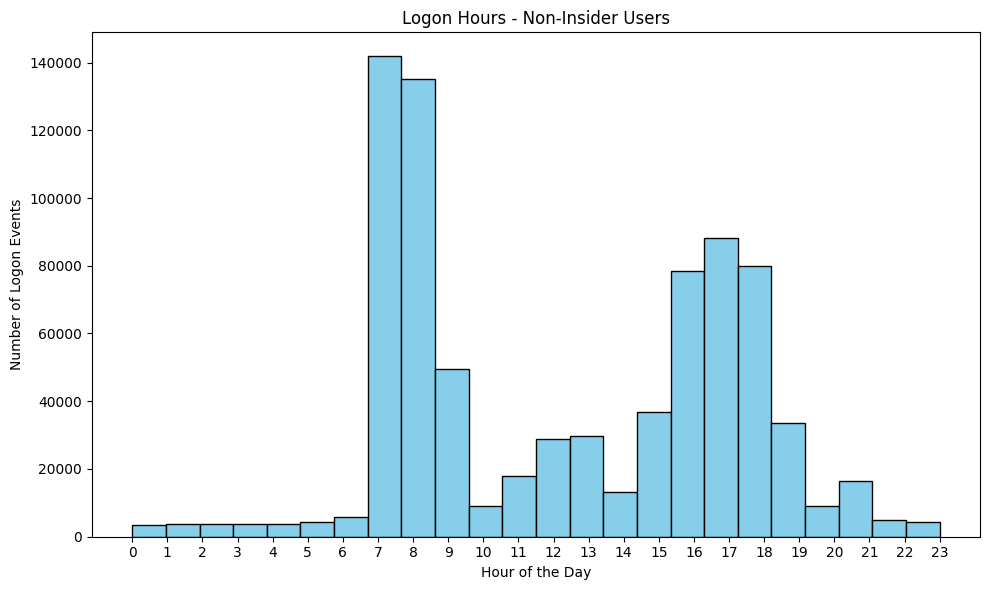

In [10]:
import matplotlib.pyplot as plt

# Step 1: Load insider users
insiders_df = pd.read_csv('/kaggle/input/insiders/insiders.csv')
insider_users = insiders_df['user'].unique()


df_logon['hour'] = pd.to_datetime(df_logon['date']).dt.hour

# Step 2: Split the df_logon DataFrame
insider_logons = df_logon[df_logon['user'].isin(insider_users)]
non_insider_logons = df_logon[~df_logon['user'].isin(insider_users)]

# Step 3: Plot histogram for insider users
plt.figure(figsize=(10, 6))
plt.hist(insider_logons['hour'], bins=24, color='salmon', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logon Events')
plt.title('Logon Hours - Insider Users')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# Step 4: Plot histogram for non-insider users
plt.figure(figsize=(10, 6))
plt.hist(non_insider_logons['hour'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logon Events')
plt.title('Logon Hours - Non-Insider Users')
plt.xticks(range(24))
plt.tight_layout()
plt.show()



*Here we can see that there are user logins at odd times like from 12 am to 6 am. There might be Insider threats in that duration*

Now, let's check the most frequent users by identifying the users who have logged in the most frequently and analyzing their logon patterns

Most Frequent Users:
 user
WPR0368    3470
AJF0370    3267
CBB0365    3256
BAL0044    3146
IBB0359    3086
LBC0356    3053
EIS0041    3052
DMG0358    3038
HDS0367    3035
UIR0043    2860
Name: count, dtype: int64

Logon patterns for user WPR0368:
Preferred logon hours: hour
8     473
16    467
22    206
Name: count, dtype: int64
Activity: activity
Logon     1735
Logoff    1735
Name: count, dtype: int64

Logon patterns for user AJF0370:
Preferred logon hours: hour
8     422
16    399
21    185
Name: count, dtype: int64
Activity: activity
Logon     1777
Logoff    1490
Name: count, dtype: int64

Logon patterns for user CBB0365:
Preferred logon hours: hour
8     405
16    385
12    173
Name: count, dtype: int64
Activity: activity
Logon     1758
Logoff    1498
Name: count, dtype: int64

Logon patterns for user BAL0044:
Preferred logon hours: hour
7     462
15    354
22    178
Name: count, dtype: int64
Activity: activity
Logon     1709
Logoff    1437
Name: count, dtype: int64

Logon patterns

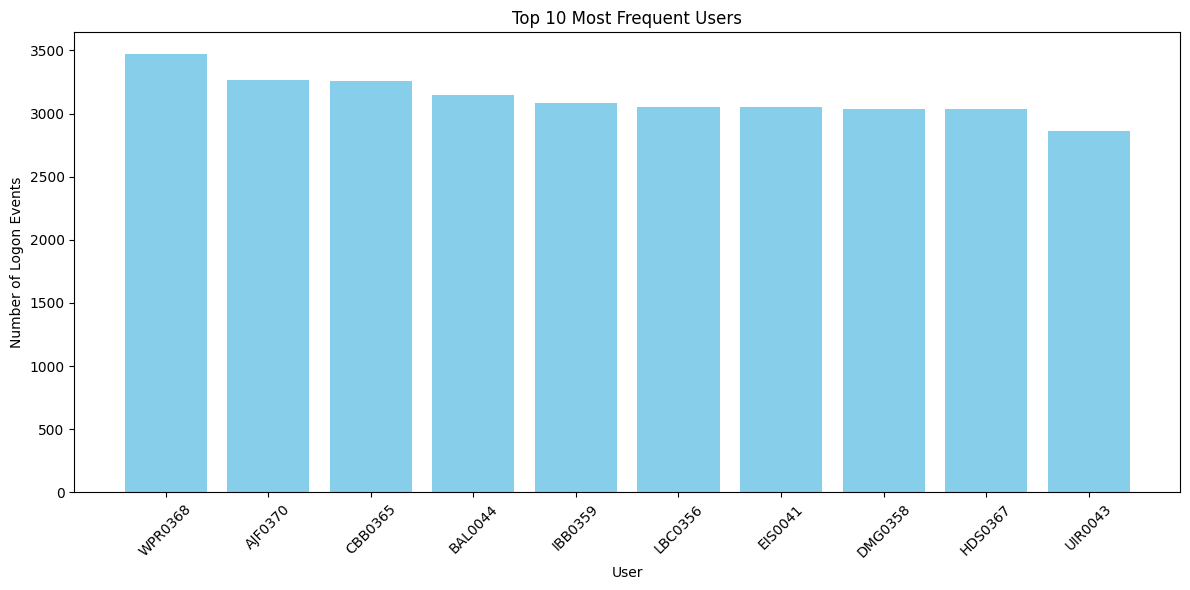

In [18]:
# Identifying the users who have logged in the most frequently.
user_logon_counts = df_logon['user'].value_counts()
most_frequent_users = user_logon_counts.head(10)  # Top 10 most frequent users
print("Most Frequent Users:\n", most_frequent_users)

# Analyzing their logon patterns, such as their preferred time of day or activity.
for user in most_frequent_users.index:
  user_df = df_logon[df_logon['user'] == user]
  print(f"\nLogon patterns for user {user}:")
  print("Preferred logon hours:", user_df['hour'].value_counts().head(3))
  print("Activity:", user_df['activity'].value_counts())


#Visualization
# Identifying the users who have logged in the most frequently.
top_10_users = user_logon_counts.head(10)

# Creatina a bar chart showing the top 10 most frequent users and their corresponding logon counts.
plt.figure(figsize=(12, 6))
plt.bar(top_10_users.index, top_10_users.values, color='skyblue')
plt.xlabel('User')
plt.ylabel('Number of Logon Events')
plt.title('Top 10 Most Frequent Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Identifying the PCs used most frequently for logon and analyzing them in a similar way**

Most Frequent PCs:
 pc
PC-4124    25514
PC-3847     4264
PC-0926     1657
PC-6184     1640
PC-0840     1545
PC-3819     1509
PC-7188     1487
PC-3842     1455
PC-7500     1443
PC-1313     1441
Name: count, dtype: int64

Logon patterns for PC PC-4124:
Number of unique users: 264
Preferred logon hours: hour
9     2425
15    2408
16    2295
Name: count, dtype: int64

Logon patterns for PC PC-3847:
Number of unique users: 137
Preferred logon hours: hour
9     491
10    454
12    448
Name: count, dtype: int64

Logon patterns for PC PC-0926:
Number of unique users: 28
Preferred logon hours: hour
17    290
8     272
7     236
Name: count, dtype: int64

Logon patterns for PC PC-6184:
Number of unique users: 27
Preferred logon hours: hour
18    495
7     491
12    168
Name: count, dtype: int64

Logon patterns for PC PC-0840:
Number of unique users: 29
Preferred logon hours: hour
16    454
8     453
13    154
Name: count, dtype: int64

Logon patterns for PC PC-3819:
Number of unique users: 27
Pr

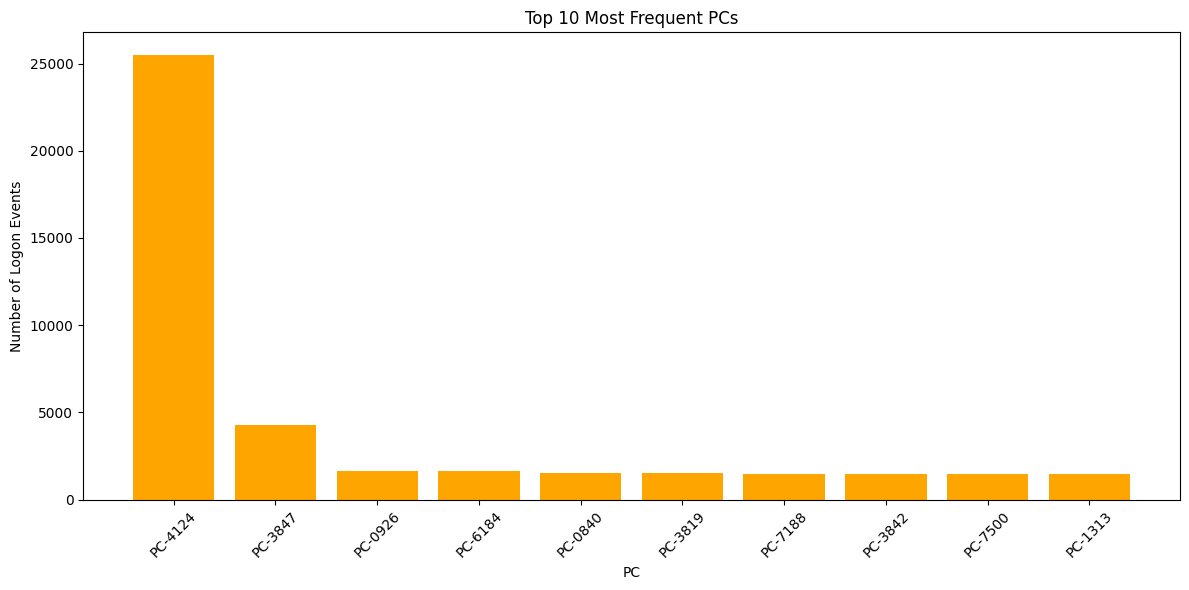

In [20]:
# Identifying the PCs used most frequently for logon.
pc_logon_counts = df_logon['pc'].value_counts()
most_frequent_pcs = pc_logon_counts.head(10)  # Top 10 most frequent PCs
print("Most Frequent PCs:\n", most_frequent_pcs)

# Analyzing the logon patterns on these PCs, such as the number of users who log in to each PC, or the time of day that these PCs are mostly used.
for pc in most_frequent_pcs.index:
  pc_df = df_logon[df_logon['pc'] == pc]
  print(f"\nLogon patterns for PC {pc}:")
  print("Number of unique users:", pc_df['user'].nunique())
  print("Preferred logon hours:", pc_df['hour'].value_counts().head(3))


# Visualization
# Identifying the PCs used most frequently for logon.
top_10_pcs = pc_logon_counts.head(10)

# Creating a bar chart showing the top 10 most frequent PCs and their corresponding logon counts.
plt.figure(figsize=(12, 6))
plt.bar(top_10_pcs.index, top_10_pcs.values, color='orange')
plt.xlabel('PC')
plt.ylabel('Number of Logon Events')
plt.title('Top 10 Most Frequent PCs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyzing Logon by Weekday/Weekend login**

In [21]:
# Converting the 'date' column to datetime objects
df_logon['date'] = pd.to_datetime(df_logon['date'], format='%m/%d/%Y %H:%M:%S')
print(df_logon['date'].head())

# Extract day of the week (0=Monday, 6=Sunday)
df_logon['day_of_week'] = df_logon['date'].dt.dayofweek
print(df_logon.head())

0   2010-01-02 06:49:00
1   2010-01-02 06:50:00
2   2010-01-02 06:53:04
3   2010-01-02 07:00:00
4   2010-01-02 07:00:00
Name: date, dtype: datetime64[ns]
                         id                date     user       pc activity  \
0  {X1D9-S0ES98JV-5357PWMI} 2010-01-02 06:49:00  NGF0157  PC-6056    Logon   
1  {G2B3-L6EJ61GT-2222RKSO} 2010-01-02 06:50:00  LRR0148  PC-4275    Logon   
2  {U6Q3-U0WE70UA-3770UREL} 2010-01-02 06:53:04  LRR0148  PC-4124    Logon   
3  {I0N5-R7NA26TG-6263KNGM} 2010-01-02 07:00:00  IRM0931  PC-7188    Logon   
4  {D1S0-N6FH62BT-5398KANK} 2010-01-02 07:00:00  MOH0273  PC-6699    Logon   

   hour  day_of_week  
0     6            5  
1     6            5  
2     6            5  
3     7            5  
4     7            5  


In [22]:
# Creating a new column 'is_weekend' based on 'day_of_week'
df_logon['is_weekend'] = (df_logon['day_of_week'] == 5) | (df_logon['day_of_week'] == 6)
display(df_logon.head())

,id,date,user,pc,activity,hour,day_of_week,is_weekend
0,{X1D9-S0ES98JV-5357PWMI},2010-01-02 06:49:00,NGF0157,PC-6056,Logon,6,5,True
1,{G2B3-L6EJ61GT-2222RKSO},2010-01-02 06:50:00,LRR0148,PC-4275,Logon,6,5,True
2,{U6Q3-U0WE70UA-3770UREL},2010-01-02 06:53:04,LRR0148,PC-4124,Logon,6,5,True
3,{I0N5-R7NA26TG-6263KNGM},2010-01-02 07:00:00,IRM0931,PC-7188,Logon,7,5,True
4,{D1S0-N6FH62BT-5398KANK},2010-01-02 07:00:00,MOH0273,PC-6699,Logon,7,5,True


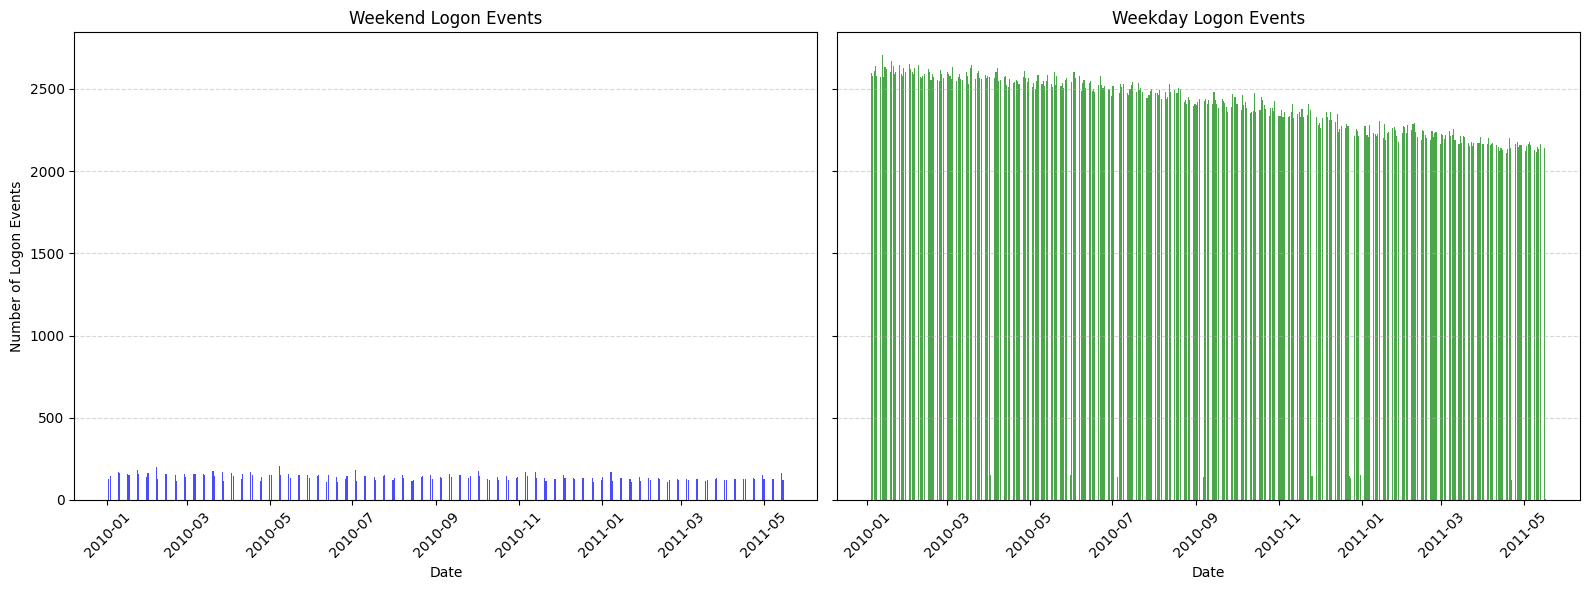

In [26]:
# Filtering the DataFrames based on only weekend logon and only weekday logon events.
df_weekend_logons = df_logon[df_logon['is_weekend'] == True]
df_weekday_logons = df_logon[df_logon['is_weekend'] == False]


#Visualization
# Group data by date and count logon events for weekends and weekdays
weekend_counts = df_weekend_logons.groupby(df_weekend_logons['date'].dt.date)['date'].count()
weekday_counts = df_weekday_logons.groupby(df_weekday_logons['date'].dt.date)['date'].count()


# Creating side-by-side subplots for weekend and weekday logon events
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Weekend logons
axes[0].bar(weekend_counts.index, weekend_counts.values, color='blue', alpha=0.7)
axes[0].set_title('Weekend Logon Events')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Logon Events')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Weekday logons
axes[1].bar(weekday_counts.index, weekday_counts.values, color='green', alpha=0.7)
axes[1].set_title('Weekday Logon Events')
axes[1].set_xlabel('Date')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()
